# Edge Detection Algorithms
#### By: Rasheed Alqobbaj - 1202474

## Importing Libraries

In [1]:
# Importing Libraries
import cv2 # OpenCV for image processing
import numpy as np # Numpy for numerical operations (arrays, matrices, etc.)
import matplotlib.pyplot as plt # Matplotlib for plotting

## Function to Display Images

In [2]:
def show_images(*images, titles=None, colormaps=None):
    # Get the number of images
    num_images = len(images)

    if titles is None:
        titles = [''] * num_images

    if colormaps is None:
        # if no cmap was selected set the cmap to the default value of 'viridis'
        colormaps = ['viridis'] * num_images

    if num_images == 1:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(images[0], cmap=colormaps[0])
        ax.set_title(titles[0])
        ax.axis('off')
    elif num_images == 2:
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        for i, ax in enumerate(axes):
            ax.imshow(images[i], cmap=colormaps[i])
            ax.set_title(titles[i])
            ax.axis('off')
    elif num_images == 3:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        for i, ax in enumerate(axes):
            ax.imshow(images[i], cmap=colormaps[i])
            ax.set_title(titles[i])
            ax.axis('off')
    elif num_images == 4:
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        for i, ax in enumerate(axes):
            ax.imshow(images[i], cmap=colormaps[i])
            ax.set_title(titles[i])
            ax.axis('off')


    plt.show()

## Load Image

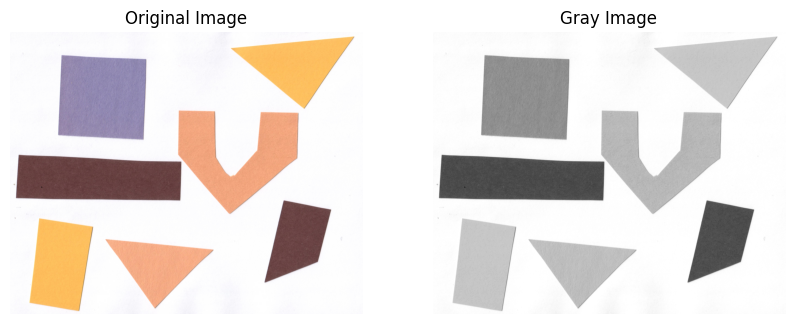

In [3]:
image = cv2.imread('Images/shapes.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

show_images(image, gray_image, titles=['Original Image', 'Gray Image'], colormaps=['viridis', 'gray'])

## Roberts Edge Detection

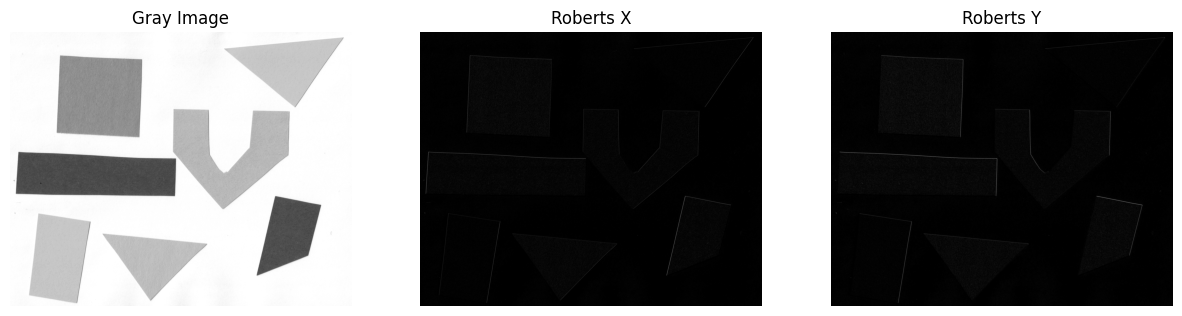

In [4]:
# Roberts Edge Detection
roberts_x_kernel = np.array([[1,  0], 
                     [0, -1]])

roberts_y_kernel = np.array([[0,  1], 
                     [-1, 0]])

roberts_x = cv2.filter2D(gray_image, -1, roberts_x_kernel)
roberts_y = cv2.filter2D(gray_image, -1, roberts_y_kernel)

show_images(gray_image, roberts_x, roberts_y, titles=['Gray Image', 'Roberts X', 'Roberts Y'], colormaps=['gray', 'gray', 'gray'])

## Sobel Edge Detection

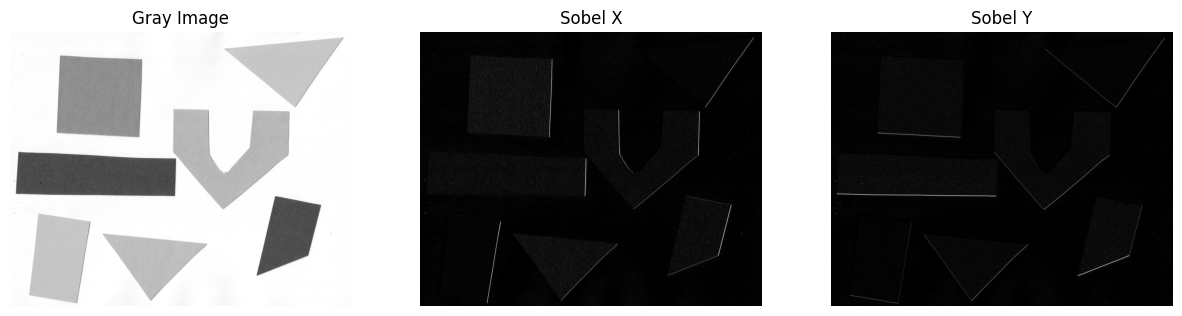

In [5]:
# Sobel Edge Detection
sobel_x_kernel = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y_kernel = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

sobel_x = cv2.filter2D(gray_image, -1, sobel_x_kernel)
sobel_y = cv2.filter2D(gray_image, -1, sobel_y_kernel)

show_images(gray_image, sobel_x, sobel_y, titles=['Gray Image', 'Sobel X', 'Sobel Y'], colormaps=['gray', 'gray', 'gray'])

## Prewitt Edge Detection

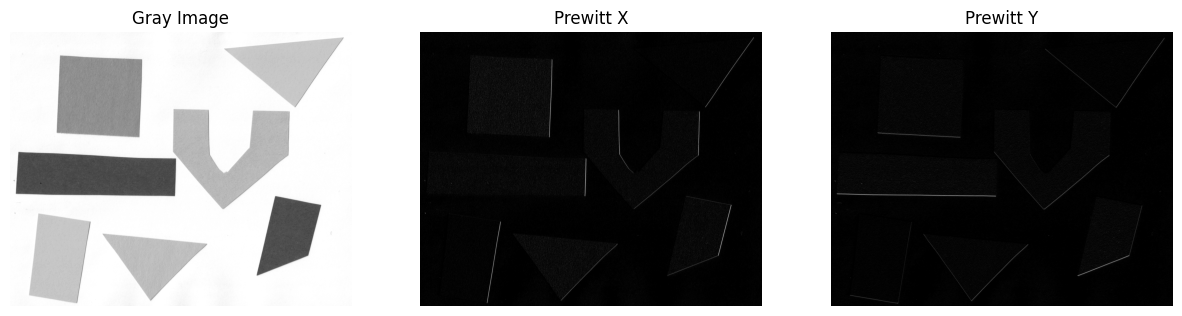

In [6]:
# Prewitt Edge Detection
prewitt_x_kernel = np.array([[-1, 0, 1], 
                      [-1, 0, 1], 
                      [-1, 0, 1]])

prewitt_y_kernel = np.array([[-1, -1, -1], 
                      [ 0,  0,  0], 
                      [ 1,  1,  1]])

prewitt_x = cv2.filter2D(gray_image, -1, prewitt_x_kernel)
prewitt_y = cv2.filter2D(gray_image, -1, prewitt_y_kernel)

show_images(gray_image, prewitt_x, prewitt_y, titles=['Gray Image', 'Prewitt X', 'Prewitt Y'], colormaps=['gray', 'gray', 'gray'])

## Laplacian Edge Detection

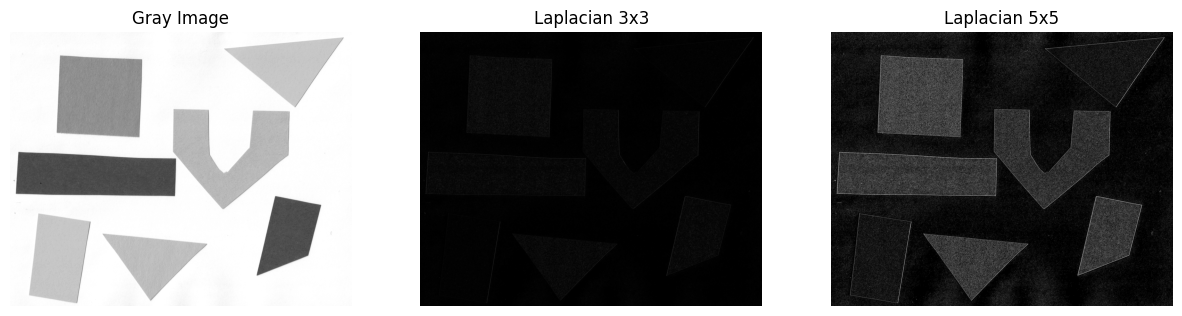

In [7]:
# Laplacian Edge Detection
laplacian_3_kernel = np.array([[0,  1, 0], 
                      [1, -4, 1], 
                      [0,  1, 0]])

laplacian_5_kernel = np.array([[1, 1, 1, 1, 1], 
                        [1, 1, 1, 1, 1], 
                        [1, 1, -24, 1, 1], 
                        [1, 1, 1, 1, 1], 
                        [1, 1, 1, 1, 1]])

laplacian_3 = cv2.filter2D(gray_image, -1, laplacian_3_kernel)
laplacian_5 = cv2.filter2D(gray_image, -1, laplacian_5_kernel)

show_images(gray_image, laplacian_3, laplacian_5, titles=['Gray Image', 'Laplacian 3x3', 'Laplacian 5x5'], colormaps=['gray', 'gray', 'gray'])

## Laplacian of Gaussian (LoG) Edge Detection

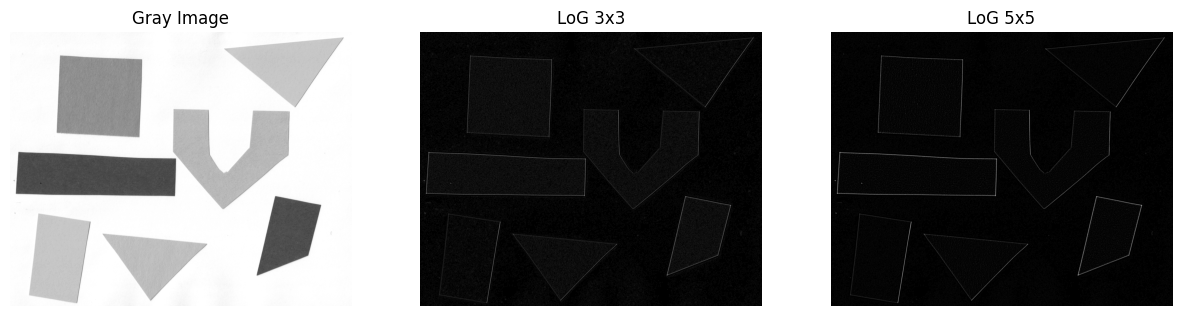

In [15]:
# LoG Edge Detection
# convole the image with Gaussian mask of Scale 3
# The size of the mask should be >= 6*scale (Keeping it odd)
gauss = cv2.GaussianBlur(gray_image, (19, 19), 3)

log3 = cv2.filter2D(gauss, -1, laplacian_3_kernel)
log5 = cv2.filter2D(gauss, -1, laplacian_5_kernel)

show_images(gray_image, log3, log5, titles=['Gray Image', 'LoG 3x3', 'LoG 5x5'], colormaps=['gray', 'gray', 'gray'])

## Difference of Gaussians (DoG) Edge Detection

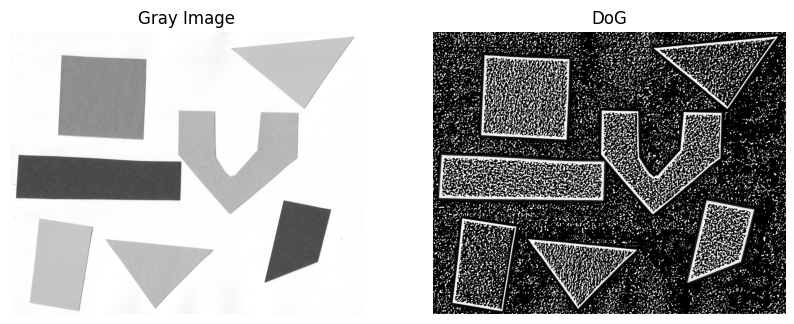

In [18]:
# DoG Edge Detection
# convole the image with Gaussian mask of Scale 3, 9
# The size of the mask should be >= 6*scale (Keeping it odd)
gauss1 = cv2.GaussianBlur(gray_image, (19, 19), 3)
gauss2 = cv2.GaussianBlur(gray_image, (55, 55), 9)

dog = gauss1 - gauss2

show_images(gray_image, dog, titles=['Gray Image', 'DoG'], colormaps=['gray', 'gray'])

## Canny Edge Detection

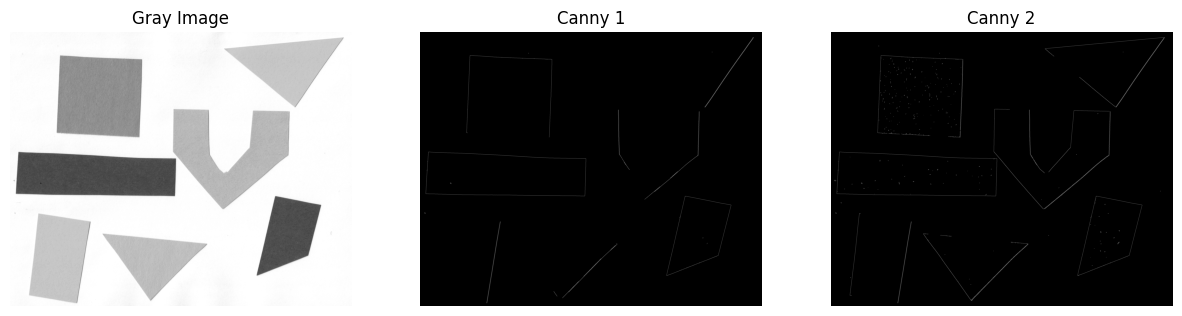

Lower Threshold: 171, Upper Threshold: 332


In [19]:
# Canny Edge Detection
# Find the median then the two thresholds of the gray resized image
v = np.median(gray_image)
lower = int(0.68 * v)
upper = int(1.32 * v)

canny_1 = cv2.Canny(gray_image, lower, upper)
canny_2 = cv2.Canny(gray_image, 100, 200)

show_images(gray_image, canny_1, canny_2, titles=['Gray Image', 'Canny 1', 'Canny 2'], colormaps=['gray', 'gray', 'gray'])
print(f'Lower Threshold: {lower}, Upper Threshold: {upper}')

## Comparison

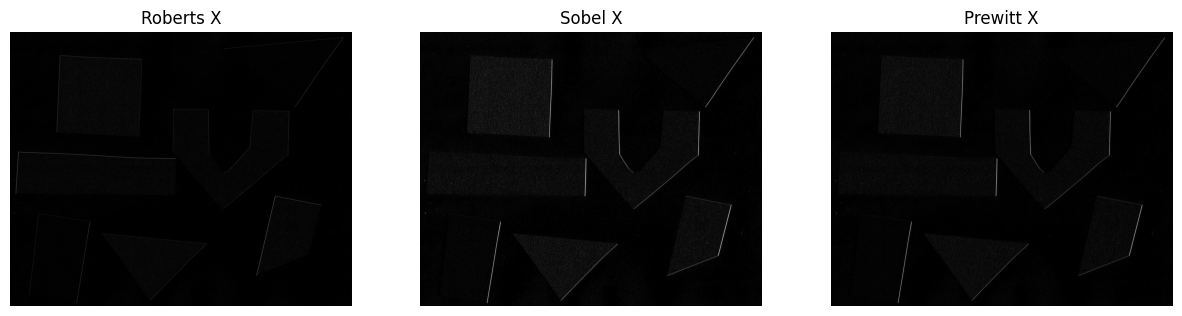

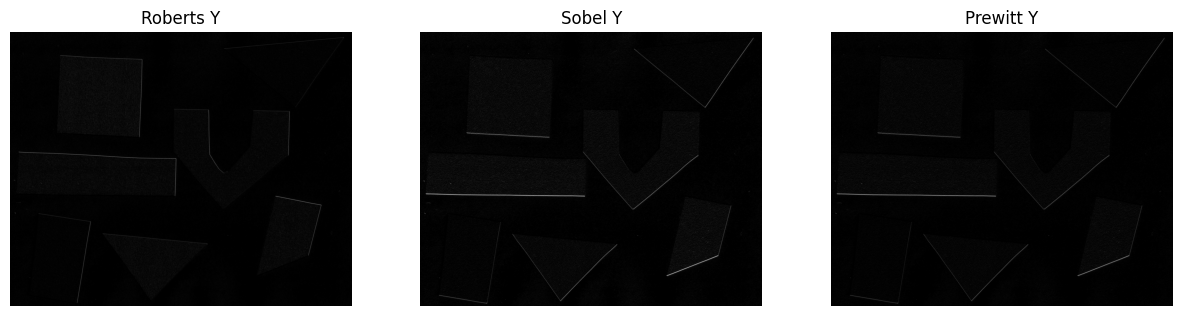

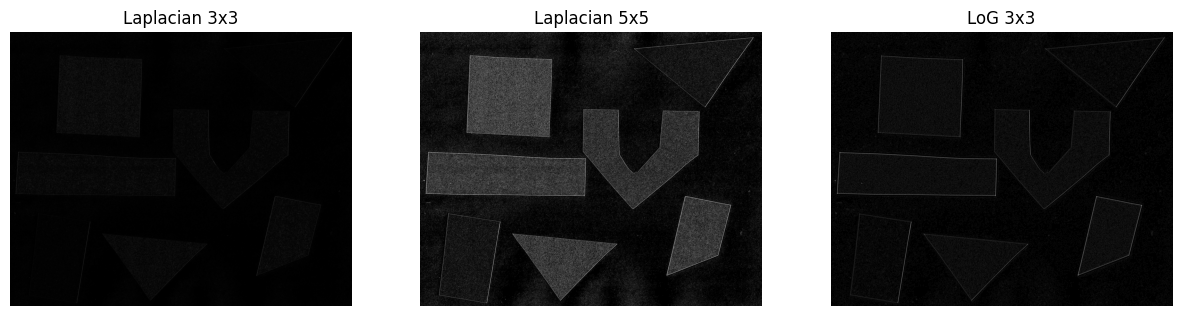

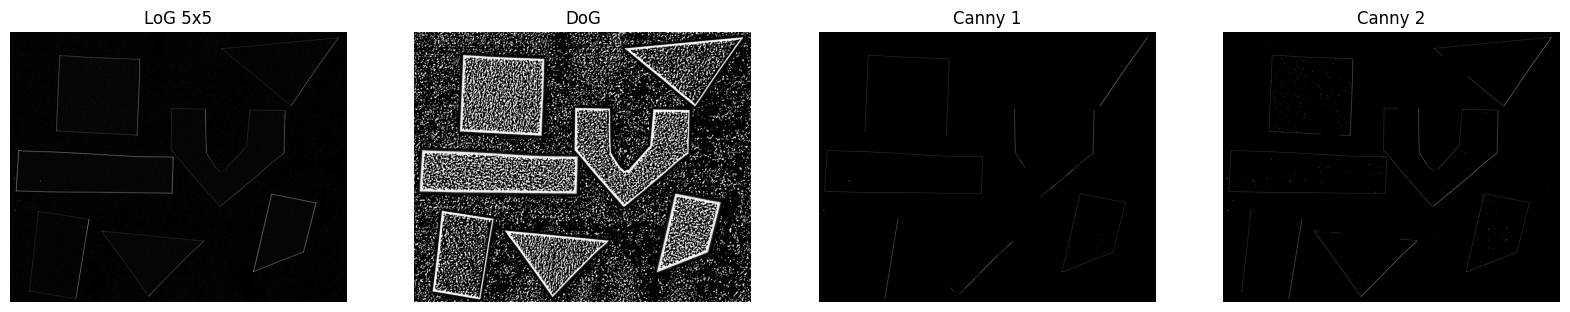

In [21]:
show_images(roberts_x, sobel_x, prewitt_x, titles=['Roberts X', 'Sobel X', 'Prewitt X'], colormaps=['gray', 'gray', 'gray'])
show_images(roberts_y, sobel_y, prewitt_y, titles=['Roberts Y', 'Sobel Y', 'Prewitt Y'], colormaps=['gray', 'gray', 'gray'])
show_images(laplacian_3, laplacian_5, log3, titles=['Laplacian 3x3', 'Laplacian 5x5', 'LoG 3x3'], colormaps=['gray', 'gray', 'gray'])
show_images(log5, dog, canny_1, canny_2, titles=['LoG 5x5', 'DoG', 'Canny 1', 'Canny 2'], colormaps=['gray', 'gray', 'gray', 'gray'])

## Conclusion
As predicted the Canny Edge Detection algorithm outperformed the other algorithms. followed by the Laplacian of Gaussian (LoG) and the Difference of Gaussians (DoG) algorithms. The Sobel and Prewitt algorithms performed similarly, while the Roberts algorithm performed the worst.

###### Rasheed Alqobbaj - 1202474